In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error
from sklearn.preprocessing import StandardScaler

In [4]:
!dir

 Volume in drive C is OS
 Volume Serial Number is A28F-5E18

 Directory of c:\Users\pc\OneDrive\Desktop\sc

14-01-2025  21:13    <DIR>          .
14-01-2025  20:31    <DIR>          ..
14-01-2025  20:32    <DIR>          SC_Optimization_ML
14-01-2025  21:14            12,474 temp.ipynb
               1 File(s)         12,474 bytes
               3 Dir(s)  14,512,816,128 bytes free


In [12]:
data = pd.read_csv('sale_data_1.csv')

In [55]:
data.head()

,date,sales,month,day,product_A,product_B
0,2023-01-01,50,1,1,True,False
1,2023-01-01,30,1,1,False,True
2,2023-01-02,60,1,2,True,False
3,2023-01-02,40,1,2,False,True
4,2023-01-03,75,1,3,True,False


In [14]:
# Convert the 'date' column to datetime format
data['date'] = pd.to_datetime(data['date'])

# Extract useful features from the date column (e.g., month, day)
data['month'] = data['date'].dt.month
data['day'] = data['date'].dt.day

In [15]:
# One-hot encode the 'product_type' categorical column
data = pd.get_dummies(data, columns=['product_type'], prefix='product')

In [19]:
data.head(6)

,date,sales,month,day,product_A,product_B
0,2023-01-01,50,1,1,True,False
1,2023-01-01,30,1,1,False,True
2,2023-01-02,60,1,2,True,False
3,2023-01-02,40,1,2,False,True
4,2023-01-03,75,1,3,True,False
5,2023-01-03,45,1,3,False,True


In [20]:
# Separate features and target variable
X = data.drop(['sales', 'date'], axis=1)  # 'date' is dropped as it won't be used directly
y = data['sales']

In [21]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [22]:
# Standardize numerical features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [23]:
X_test

,month,day,product_A,product_B
19,1,10,False,True
16,1,9,True,False
15,1,8,False,True
26,1,14,True,False
4,1,3,True,False
12,1,7,True,False
37,1,19,False,True
27,1,14,False,True


In [92]:
# Initialize the model (Random Forest Regressor)
model = RandomForestRegressor(n_estimators=150, random_state=42)

In [93]:
# Train the model
model.fit(X_train_scaled, y_train)

RandomForestRegressor(n_estimators=150, random_state=42)

In [94]:
# Make predictions on the test set
predictions = model.predict(X_test_scaled)

In [95]:
predictions

array([49.83333333, 87.33333333, 61.46666667, 83.96666667, 63.76666667,
       74.33333333, 68.        , 68.13333333])

In [96]:
y_test.values

array([65, 75, 80, 80, 75, 85, 80, 65], dtype=int64)

In [97]:
# Evaluate the model
mae = mean_absolute_error(y_test, predictions)
print(f'Mean Absolute Error: {mae}')

Mean Absolute Error: 10.879166666666666


In [98]:
import matplotlib.pyplot as plt

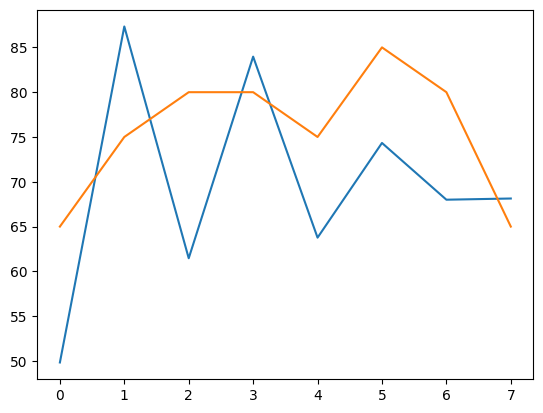

In [99]:
plt.plot(predictions)
plt.plot(y_test.values)